<a href="https://colab.research.google.com/github/LivroRelampagos/Estudo_de_Caso/blob/main/plota_Time_x_Height_plots_Radar_FCTH_lagrangeano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Plota figura da Evolução Temporal do Perfil de Máxima Refletividade**

---
**OBJETIVO:** Este Google Colab plota a figura da evolução temporal do perfil de máxima refletividade do radar. É contabilizado a máxima refletividade dentro da tempestade para cada altura, e para cada tempo da evolução do ciclo de vida da tempestade.



---



**DADOS DE ENTRADA**: CAPPI de refletividade do radar de 3 a 15 km de altura. 
- **Tipo do dado:** Radar do FCTH durante a campanha CHUVA-Vale
- **Formato do dado:** arquivo binário 
- **Nome do arquivo:** cappi_CZ_03000_20111213_2210.dat.gz
- **Gerado por:** Thiago Biscaro - CPTEC/INPE 
---
**DADOS DE SAÍDA:** Figura de máxima refletividade para cada altura e tempo
- **Tipo do dado:** Figura
- **Formato do dado:** arquivo PNG 
- **Nome do arquivo:** tempestade_7_timexheight_20120109_1703.png
- **Gerado por:** Enrique Mattos - IRN/UNIFEI 
---
**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Importação das bibliotecas
3.   Monta o drive da pessoa
4.   Importa funções
5.   Leitura dos horários da tempestade e latitudes e longitudes de rastreamento
4.   Download dos dados do radar, através do Dropbox
5.   Descompacta os dados baixados
6.   Declara as informações do radar
7.   Realiza os cálculos: 
    - Descompacta o arquivo binário 
    - Leitura do arquivo binário
    - Transforma a matriz para xarrayDataSet
    - Recorta os dados para a área de rastreamento
    - Extrai a máxima refletividade daquela área 
8.  Plota figura
 
---
**OBSERVAÇÕES IMPORTANTES**: 
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive 
    - 2. Número da tempestade

---

- **Realizado por:** Enrique V. Mattos - 11/dez/2021 
- **Atualizado por:** Enrique V. Mattos e Raquel Gonçalves Pereira - 10/03/2022


# **### >>> MUDANÇAS AQUI <<< ###**



- **Insira o caminho do seu drive**: alterar aqui

In [ ]:
dir = '/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/'

- **Caminhos dos diretórios**: aqui não precisa alterar

In [ ]:
# nome do arquivo de rastreamento da tempestade
nome_lista = f'rastreamento_tempestade.txt'

# definindo os caminhos 
path_input = f'{dir}1_rastreamento_tempestades_radar_FCTH/output/'  # caminho do arquivo de rastreamento da tempestade
path_output = f'{dir}2_time_x_plots_radar/output/' # caminho onde as figuras serão salvas

# definindo os diretórios dos dados de radar, splma e brasildat 
dir_dados_radar = f'{dir}dados_radar_fcth/' # diretório dos dados de RADAR

# exibe na tela
print(path_input)
print(path_output)

/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/1_rastreamento_tempestades_radar_FCTH/output/
/content/drive/MyDrive/Mestrado/LIVRO_RAQUEL/2_time_x_plots_radar/output/


# **Instala Bibliotecas**

In [ ]:
# Instalando o proplot (usado para gerar Mapas também)
!pip install proplot==0.6.4
print('\n')

# Instalando o py_art (biblioteca para trabalhar com dados de radar)
!pip install arm_pyart
print('\n')

     |████████████████████████████████| 7.9 MB 5.9 MB/s 


     |████████████████████████████████| 11.0 MB 3.8 MB/s 
  Created wheel for arm-pyart: filename=arm_pyart-1.11.8-cp37-cp37m-linux_x86_64.whl size=10224441 sha256=758ba2c6a102e25a9cff556f3e673fe453ffa92cdacdcc9076128b291c908509
  Stored in directory: /root/.cache/pip/wheels/23/02/96/a0b69bde93fa0b3bf284859b42c28f28df49f557e93ae5ad02
Successfully built arm-pyart




# **Importa bibliotecas**

**importa bibliotecas**

In [ ]:
import numpy as np
import proplot as plot
import matplotlib.pyplot as plt
import glob
import pyart
import os
import gzip
import shutil
import tarfile
import xarray as xr
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/proplot/config.py:1454: ProPlotWarning: Rebuilding font cache.



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



/usr/local/lib/python3.7/dist-packages/yaml/constructor.py:126: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  if not isinstance(key, collections.Hashable):
/usr/local/lib/python3.7/dist-packages/dask/array/numpy_compat.py:21: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.divide(0.4, 1, casting="unsafe", dtype=np.float),
/usr/local/lib/python3.7/dist-packages/scipy/fft/__init__.py:97: DeprecationWarning: The module numpy.dual is deprecated.  Instead of using dual, use the functions directly from numpy or scipy.
  from numpy.dual import regist

**monta drive para salvar arquivos de saída**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Importa funções**

In [ ]:
#-----------------------------------------------------------------------------------   
# Plota isotermas para o gráfico timeXheight Plots 
#----------------------------------------------------------------------------------- 
def evm_plot_isoterms_timexheight_plots(temperaturas, xmin, xmax):

    """
    Plota linhas horizontais das isotermas

    Parâmetros de entrada:
                temperaturas (lista): temperaturas as serem plotadas 
                xmin (float): valor mínimo do eixo X  
                xmax (float): valor máximo do eixo X 

    Parâmetros de saída:
                plota a isoterma com o label da temperatura em graus Celsius
    """

    import pandas as pd

    # Leitura do DataFrame
    df = pd.read_csv(f'{dir}2_time_x_plots_radar/temp_alt.txt', delimiter=';') 
    
    # Loop das isotermas que pretende-se plotar
    for temperatura in temperaturas:

        # estrai a altura daquela isoterma        
        alt = df[df['temp_degre'] == temperatura]['alt_metros']
        
        # plota a linha tracejada
        ax.plot([xmin, xmax], [alt/1000.,alt/1000.], linewidth=2, linestyle='--', color='black')

        # plota o nome da isoterma
        ax.text( xmax-(0.07*xmax), (alt/1000.)+0.2, f'{str(temperatura)}$\degree$C', size=12)

# Criando a pasta de saída

In [ ]:
import os
os.makedirs(f'{path_output}', exist_ok=True)

# **Leitura dos horários da tempestade**

In [ ]:
"""
Exemplo do arquivo:
 ANO   MES   DIA   HOR   MIN    LONMIN    LONMAX    LATMIN    LATMAX 
2012    01    09    17    03  -47.4000  -47.0000  -23.2000  -22.8000 
2012    01    09    17    08  -47.4000  -47.0000  -23.1000  -22.7000 
2012    01    09    17    13  -47.4000  -47.0000  -23.1000  -22.7000 
"""

# leitura do arquivo de rastreamento da tempestade
lista = np.loadtxt(f'{path_input}{nome_lista}', skiprows=1)

# extrae a data e hora das linhas doa arquivo
ano, mes, dia, hor, minu = list(lista[:,0]), list(lista[:,1]), list(lista[:,2]), list(lista[:,3]), list(lista[:,4])

# extrae as longitudes esquerda e direita e latitudes inferior e superior do arquivo
lon_esq, lon_dir, lat_inf, lat_sup = list(lista[:,5]), list(lista[:,6]), list(lista[:,7]), list(lista[:,8])

# extrae a quantidade de tempos da tempestade
ntimes = len(ano)

# data e horario do primeira imagem do arquivo
datai = str(int(ano[0])) + str(int(mes[0])).zfill(2) + str(int(dia[0])).zfill(2) + '_' + str(int(hor[0])).zfill(2) + str(int(minu[0])).zfill(2)
datai

'20120109_1703'

# **Descompactando os dados**

In [ ]:
#-------------------------------------------------------#
#                     RADAR
#-------------------------------------------------------#
# Descompactando os dados do radar
print('destargeando arquivos do RADAR ---> ')
filename = 'cappi_CZ_radar_FCTH_2012-01-09.tar.gz'

tar_file = tarfile.open(f'{dir_dados_radar}{filename}')
tar_file.getnames()
tar_file.extractall()

destargeando arquivos do RADAR ---> 


# **Informações do radar**

In [ ]:
# número de colunas e linhas da matriz do radar
nz, ny, nx = 13, 500, 500

# área da matriz do radar
lonmin, lonmax, latmin, latmax = -48.4564, -43.4780, -25.8367, -21.3360 
altmin, altmax = 3, 15

# localização do radar
lat_radar, lon_radar = -23.6000, -45.9722

# resolução espacial em graus da lat e lon (=0.01 graus)
dx = (lonmax-lonmin)/(nx-1)
dy = (latmax-latmin)/(ny-1)

# cria matriz de latitudes e longitudes
lat = np.linspace(latmin, latmax, ny) 
lon = np.linspace(lonmin, lonmax, nx)

# cria o array de altura
alts = np.arange(altmin, altmax+1)

# reprojeta as lons e lats do radar para uma matriz bidimensional
lon, lat = np.meshgrid(lon, lat)

# Usado para transformar de binário para netcdf
lats = np.linspace(latmin, latmax, ny) 
lons = np.linspace(lonmin, lonmax, nx)

# **1) Cálculos:**

In [ ]:
# Declaração das variáveis
hormin = [] # inicia a variável qua guarda a hora e minuto
maxdbz = np.zeros((ntimes, nz)) #13 = alturas
time = 0 # inicia o contador das imagens

# Loop nos horários
for iano, imes, idia, ihor, imin, ilon_esq, ilon_dir, ilat_inf, ilat_sup in zip(ano, mes, dia, hor, minu, lon_esq, lon_dir, lat_inf, lat_sup):
 
    # transforma data e hora para string
    ano2, mes2, dia2, hor2, min2 = str(int(iano)), str(int(imes)).zfill(2), str(int(idia)).zfill(2), str(int(ihor)).zfill(2), str(int(imin)).zfill(2)
    print('\n Processando === >>>', time, f'{ano2}-{mes2}-{dia2}_{hor2}{min2}')

    # monta lista dos arquivos de CAPPI de 3 a 15 km daquele horário
    files = [f'cappi_CZ_{str(i*1000).zfill(5)}_{ano2}{mes2}{dia2}_{hor2}{min2}.dat.gz' for i in range(3, 16)]

    # monta horamin
    hormin.append(f'{hor2}:{min2}')
    
    # loops dos CAPPI (3-15 km) daquele horário
    alt = 0
    for file in files:

        print('.....', file)

        # -----------------------------------------------------------# 
        #             Leitura do binário do radar
        # -----------------------------------------------------------# 
        # descompacta arquivo (transforma de 'cappi_CZ_03000_20111213_2210.dat.gz' para 'cappi_CZ_03000_20111213_2210.dat') 
        with gzip.open(f'/content/{file}', 'rb') as entrada: # /content/cappi_CZ_02000_20111201_0003.dat.gz
            with open(f'/content/{file[0:-3]}', 'wb') as saida:
                shutil.copyfileobj(entrada, saida)

        # leitura do arquivo binário do radar
        dados0 = np.fromfile(f'/content/{file[0:-3]}', np.float32)

        # reprojeta o dado de 1D para matriz 2D
        dados1 = dados0.reshape(ny, nx)      

        # mascara refletividade menor que 0 dBZ      
        dados = np.ma.masked_array(dados1, dados1 < 0.)  

        # -----------------------------------------------------------# 
        #   Transforma a matriz do radar para Netcdf
        # -----------------------------------------------------------# 
        # gerando dataset em formato netcdf
        data_vars = {'dbz':(('lat', 'lon'), dados, {'units': 'dBZ', 'long_name':'refletividade FCTH'})}
        coords = {'lat': lats, 'lon': lons}
        ds = xr.Dataset(data_vars=data_vars, coords=coords)

        # faz o recorte no arquivo NetCdf
        ds = ds.sel(lon=slice(ilon_esq, ilon_dir), lat=slice(ilat_inf, ilat_sup))

        # -----------------------------------------------------------# 
        #   Extrai a refletividade máxima daquela altura
        # -----------------------------------------------------------# 
        maxdbz[time,alt] = np.nanmax(ds['dbz'])

        alt+=1    
    time+=1


 Processando === >>> 0 2012-01-09_1703
..... cappi_CZ_03000_20120109_1703.dat.gz
..... cappi_CZ_04000_20120109_1703.dat.gz
..... cappi_CZ_05000_20120109_1703.dat.gz
..... cappi_CZ_06000_20120109_1703.dat.gz
..... cappi_CZ_07000_20120109_1703.dat.gz
..... cappi_CZ_08000_20120109_1703.dat.gz
..... cappi_CZ_09000_20120109_1703.dat.gz
..... cappi_CZ_10000_20120109_1703.dat.gz
..... cappi_CZ_11000_20120109_1703.dat.gz
..... cappi_CZ_12000_20120109_1703.dat.gz
..... cappi_CZ_13000_20120109_1703.dat.gz
..... cappi_CZ_14000_20120109_1703.dat.gz
..... cappi_CZ_15000_20120109_1703.dat.gz

 Processando === >>> 1 2012-01-09_1708
..... cappi_CZ_03000_20120109_1708.dat.gz
..... cappi_CZ_04000_20120109_1708.dat.gz
..... cappi_CZ_05000_20120109_1708.dat.gz
..... cappi_CZ_06000_20120109_1708.dat.gz
..... cappi_CZ_07000_20120109_1708.dat.gz
..... cappi_CZ_08000_20120109_1708.dat.gz
..... cappi_CZ_09000_20120109_1708.dat.gz
..... cappi_CZ_10000_20120109_1708.dat.gz
..... cappi_CZ_11000_20120109_1708.dat

# **2) Plota figura:**

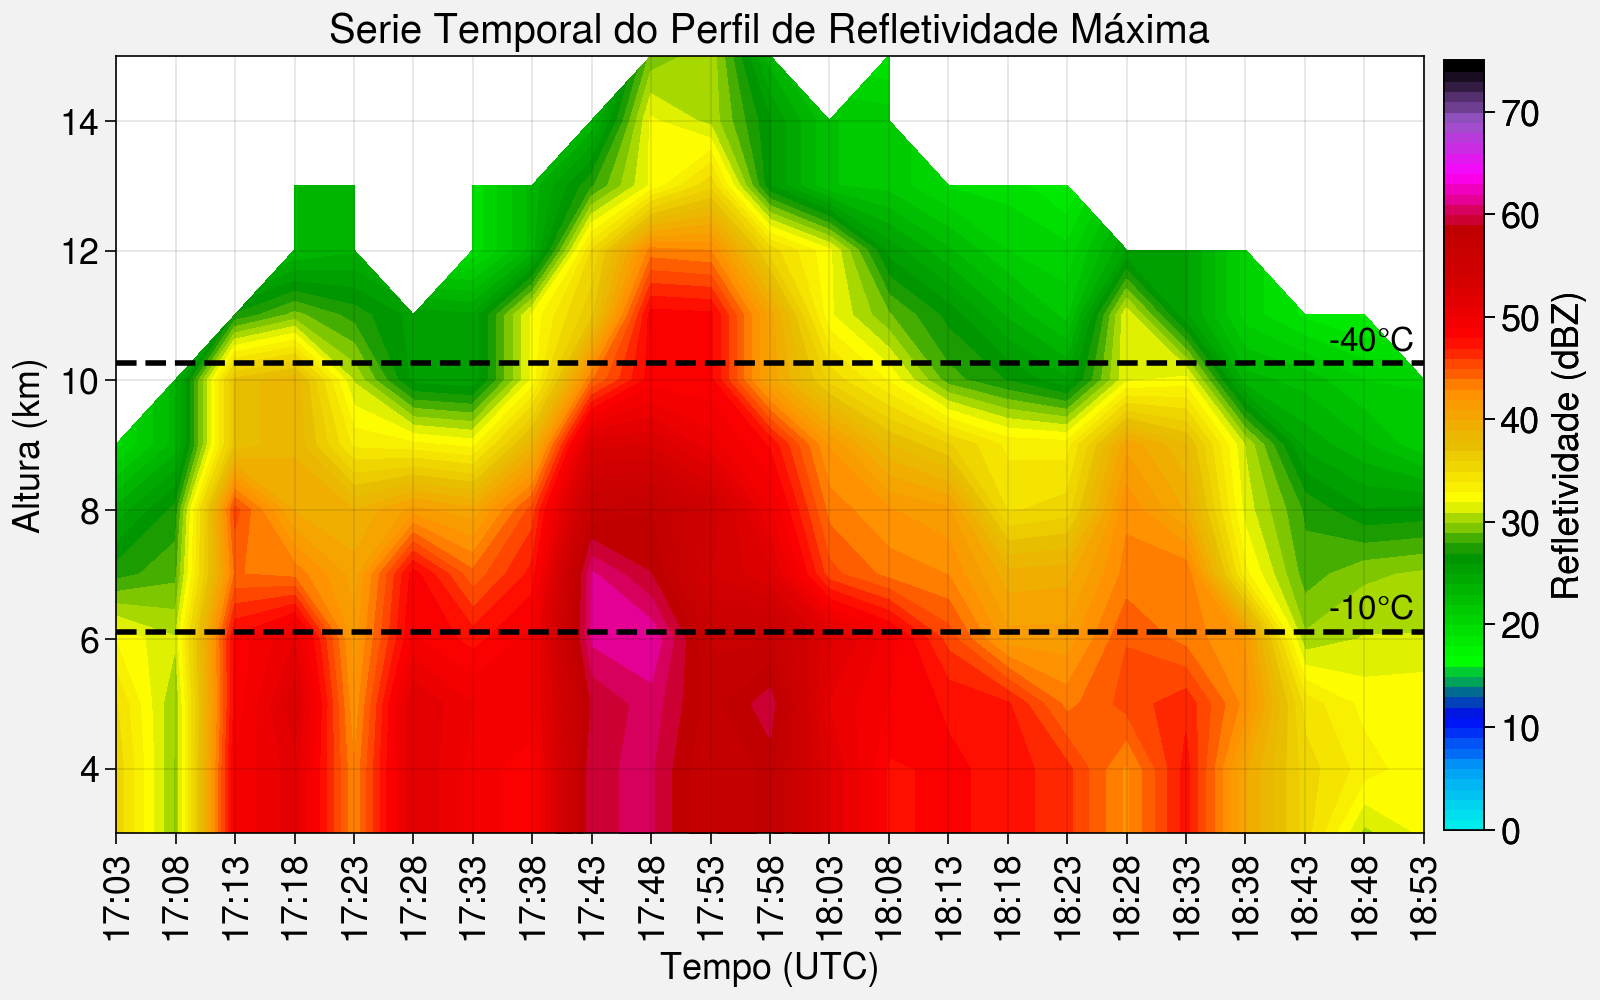

In [ ]:
# define os índices do tempo das imagens (é um array de 1 a 23)
tempos = np.arange(1, ntimes+1, 1) # array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

# transforma o array 'alts' e 'tempos' para arrar 2D
alt_y, time_x  = np.meshgrid(alts, tempos)

# cria a moldura da figura
fig, ax = plot.subplots(figsize=(8,5), tight=True)

# plota figura
map1 = ax.contourf(time_x, alt_y, maxdbz, cmap='pyart_NWSRef', levels=plot.arange(0., 75., 1.0))

# formatação dos eixos
ax.format(title=f'Serie Temporal do Perfil de Refletividade Máxima', xlabel='Tempo (UTC)', ylabel='Altura (km)',
          xtickminor=False, ytickminor=False, grid=True,
          xticklabels=hormin, xticks=tempos, 
          ylim=(altmin, altmax), small='18px', large='20px', xrotation=90)

# plota isotermas
evm_plot_isoterms_timexheight_plots([-10, -40], tempos[0], tempos[-1])

# barra de cores
fig.colorbar(map1, loc='r', label='Refletividade (dBZ)', ticks=10, ticklabelsize=13, labelsize=13, width=0.2, space=0.1, length=0.99)

# salva figura
fig.save(f'{path_output}tempestade_timexheight_{datai}.png', dpi=300) 
fig.save(f'{dir}Fig2_tempestade_timexheight_{datai}.png', dpi=300) 